<a href="https://colab.research.google.com/github/adventurouscricket/facebookLiveSellersWithK-Means/blob/main/Facebook_Live_sellers_in_Thailand%2C_UCI_ML_Repo_with_K_Means(%2B%2B)_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overall about this kernel**

**K-Means clustering** is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. In this kernel, I implement **K-Means(++)** clustering to find intrinsic groups within the dataset that display the same status_type behaviour. The status_type behaviour variable consists of posts of a different nature (video, photos, statuses and links).

I have referenced from this [kernel](https://www.kaggle.com/code/prashant111/k-means-clustering-with-python/notebook) by PRASHANT BANERJEE. PRASHANT BANERJEE. With PRASHANT BANERJEE's kernel, he has directly used the K-Means model from the Scikit Learn library, but my aim is to implement the K-Means algorithm from scratch so I will use his kernel's outline and do it myself Implement the K-Means algorithm. I also use the K-Means model from the Scikit Learn library to compare the accuracy of my model.

**Contents**

1. Exploratory data analysis.
2. Implement pure K-Means and make some comparisons.
3. Use the elbow method to find optimal number of clusters.
4. Implement K-Means++ to imporove the model.

# **Overall about K-Means Clustering algorithm**

**K-Means intuition**

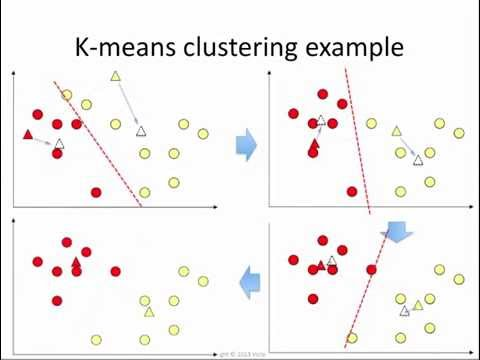

Input: Data X and the desired number of clusters K.

Output: Centers M and a label vector for each data point Y.

1. Choose K arbitrary points as initial centers.
2. Assign each data point to the cluster with the nearest center.
3. If the data point assignments in step 2 do not change compared to the previous iteration, stop the algorithm.
4. Update the center for each cluster by taking the average of all the data points assigned to that cluster in step 2.
5. Return to step 2.

(It's a bit difference between K-Means and K-Means++ is when initialing the centers)

# **Let's get started**

## **Import libraries**

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Import dataset**

In [155]:
df = pd.read_csv("/content/drive/MyDrive/Colab/ml/Live.csv")

In [156]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## **Exploratory data analysis**

Check shape of the dataset

In [157]:
df.shape

(7050, 16)

View summary of dataset

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Checking for missing values in dataset

In [159]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

We can see that there are 4 redundant columns in the dataset. We should drop them before proceeding further.

In [160]:
df = df.drop(["Column1", "Column2", "Column3", "Column4"], axis=1)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


We can see that, there are 3 character variables (data type = object) and remaining 9 numerical variables (data type = int64).

View the statistical summary of numerical variables

In [162]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


There are 3 categorical variables in the dataset. I will explore them one by one.

1. Explore status_id, status_published variable

In [163]:
status_ids = df["status_id"].unique()

In [164]:
len(status_ids)

6997

> > We can see that there are 6997 unique labels in the status_id variable. The total number of instances in the dataset is 7050. So, it is approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it.



2. It's same to status_published

In [165]:
status_publisheds = df["status_published"].unique()
len(status_publisheds)

6913

>> Drop status_id and status_published variable from the dataset

In [166]:
df = df.drop(["status_id", "status_published"], axis=1)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


3. Explore status_type variable

In [168]:
status_types = df["status_type"].unique()
status_types

array(['video', 'photo', 'link', 'status'], dtype=object)

In [169]:
len(status_types)

4

>> We can see that there are 4 categories of labels in the status_type variable.

**Convert categorical variable into integers**

In [170]:
from sklearn.preprocessing import LabelEncoder

X = df

lbe = LabelEncoder()
X["status_type"] = lbe.fit_transform(X["status_type"])

**Declare feature vector and target variable**

In [171]:
y = X["status_type"]

In [172]:
y.equals(X["status_type"])

True

In [173]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [174]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


**Feature Scaling**

In [175]:
cols = X.columns
cols

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [176]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
X = ms.fit_transform(X)
type(X)

numpy.ndarray

In [177]:
pd.DataFrame(X, columns = [cols]).head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


## **K-Means implement**

##### **Overall**

After processing the data, we will implement K-Means(++) to train model.

Recall the overview of K-Means algorithm:
Input: Data X and the desired number of clusters K.

Output: Centers M and a label vector for each data point Y.

1. Choose K arbitrary points as initial centers.
2. Assign each data point to the cluster with the nearest center.
3. If the data point assignments in step 2 do not change compared to the previous iteration, stop the algorithm.
4. Update the center for each cluster by taking the average of all the data points assigned to that cluster in step 2.
5. Return to step 2.

(It's a bit difference between K-Means and K-Means++ is when initialing the centers)

##### **How to measure the model performance?**

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as **inertia**, or **within-cluster sum-of-squares**. **Inertia**, or the **within-cluster sum of squares** criterion, can be recognized as a measure of how internally coherent clusters are.

The K-means algorithm divides a set of M samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

The K-means algorithm aims to choose centroids that minimize the **inertia**, or **within-cluster sum of squared** criterion.

**Inertia**

1. Inertia is not a normalized metric.

2. The lower values of inertia are better and zero is optimal.

3. But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of **curse of dimensionality**).

4. Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

### **Implement pure K-Means**

#### **Draft code**

The codes below will be used to implement K-Means but these are just draft codes. I do it for the convenience of coding and functional testing. Then I'll move all these functions into a class so it looks concise, clear, and like how it would be implemented in the Scikit Learn library([KMeansClustering class](#scrollTo=V-p9Bd4CoHGp&line=1&uniqifier=1)). I will comment out these draft codes below for convenience later when RUNNING ALL this kernel. If you want to see how these functions work independently when testing, feel free to uncomment the code and run it yourself.

In [178]:
# def init_centroids(X, K):
#   # randomly pick k rows of X as initial centers
#   centroids = X[np.random.choice(range(X.shape[0]), K, replace=False)]

#   return centroids

In [179]:
# init_centroids(X, 4).shape

In [180]:
# def assign_clusters(X, centroids):
#   cluster_idxs = []
#   for x in X:
#     # closest centroid using euler distance equation(calculate distance of every point from centroid)
#     cluster_idx = np.argmin(
#           np.sqrt(np.sum((x - centroids)**2, axis=1))
#         )
#     cluster_idxs.append(cluster_idx)

#   return cluster_idxs

In [181]:
# #Test assign_clusters
# X_test = np.array([[1, 2], [3, 4], [5, 6], [20, 21], [22, 23]])
# centroids_test = np.array([[2, 3], [21, 22]])
# cluster_assignments = assign_clusters(X_test, centroids_test)
# print("Cluster Assignments:", cluster_assignments)

In [182]:
# X_test[np.random.choice(range(X_test.shape[0]), 2, replace=False)]

In [183]:
# X_test[np.array(cluster_assignments)==0]

In [184]:
# np.mean(X_test[np.array(cluster_assignments)==0], axis=0)

In [185]:
# np.sum(X_test[np.array(cluster_assignments)==0], axis=1)

In [186]:
# def update_centroids(X, labels, K):
#   centroids = np.zeros((K, X.shape[1]))

#   for k in range(K):
#     # Filter all all points that were assigned to k-th cluster
#     X_k = X[np.array(labels)==k]

#     # The new centroid will be means of these points belong to k-th
#     centroids[k, :] = np.mean(X_k, axis=0)
#     # print(centroids[k, :])
#     # print(np.mean(X_k, axis=0))

#   return centroids

In [187]:
#Test update_centroids
# update_centroids(X_test, cluster_assignments, 2)

In [188]:
# def has_converged(centroids, new_centroids):
#   # return True if two sets of centers are the same
#   converged = set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids])

#   return converged

In [189]:
# # def fit(X, K, max_interation=100):
# #   labels = []
# #   inter = 0

# #   #1
# #   centroids = [init_centroids(X, K)]

# #   for _ in range(max_interation):
# #     while True:
# #       #2
# #       labels.append(assign_clusters(X, centroids[-1]))

# #       new_centroids = update_centroids(X, labels[-1], K)

# #       #3
# #       if has_converged(centroids[-1], new_centroids):
# #         break
# #       centroids.append(new_centroids)

# #       inter +=1

# #   return centroids, labels, inter

# # Keep this version
# def fit(X, K, max_interation = 100, tolerance=1e-4):
#     n_samples, n_features = X.shape
#     centroids = np.empty((K, n_features), dtype=X.dtype)
#     cluster_labels = []
#     inter = 0

#     # Step 1: Initialize centroids using K-means++
#     centroids = init_centroids(X, K)

#     for iteration in range(1, max_interation + 1):
#         # Step 2: Assign data points to the nearest centroids
#         cluster_labels = assign_clusters(X, centroids)

#         # Step 3: Update centroids based on the assigned clusters
#         new_centroids = update_centroids(X, cluster_labels, K)

#         # Step 4: Check for convergence
#         if np.all(np.abs(new_centroids - centroids) < tolerance):
#           break

#         centroids = new_centroids
#         inter = iteration

#     return centroids, cluster_labels, inter

In [190]:
# X_test

In [191]:
# #Test fit
# fit(X_test, 2)

In [192]:
# def inertia(X, centroids, labels):
#   wcss = 0
#   for k in range(centroids.shape[0]):
#     X_k = X[np.array(labels) == k]
#     if len(X_k) > 0:
#       wcss += np.sum((X_k - centroids[k, :])**2)

#   return wcss

#### **KMeans class**

In [193]:
class KMeansBase:
  def __init__(self, n_clusters, max_iter = 100, random_state=None, tolerance=1e-4):
    '''
      Parameters:
        - X: Shape (m, n), input data
        - num_clusters: Number of clusters
        - max_iterations: A specified number of iterations ensure the algorithm
          terminates even if convergence is not reached.
        - tolerance: Parameter to determine the convergence criterion. The
          iteration stops when the change in centroids is smaller than this tolerance.
        - random_state: Random state
    '''
    self.K = n_clusters
    self.max_iter = max_iter
    self.tol = tolerance
    self.random_state = random_state

    self.cluster_centers_ = None
    self.labels_ = None
    self.inertia_ = None
    self.n_iter_ = None

  def init_centroids(self, X):
    '''
      1. Choose K arbitrary points as initial centroids.
        - Randomly pick K rows of X as initial centroids.
    '''
    centroids = X[np.random.choice(range(X.shape[0]), self.K, replace=False)]

    return centroids

  def assign_clusters(self, X, centroids):
    cluster_idxs = []
    for x in X:
      # Closest centroid using euler distance equation(calculate distance of every point from centroid)
      cluster_idx = np.argmin(
            np.sqrt(np.sum((x - centroids)**2, axis=1))
          )
      cluster_idxs.append(cluster_idx)

    return cluster_idxs

  def update_centroids(self, X, labels):
    '''
      Parameters:
        - X: Input data
        - labels: (Len = number of examples): A list containing the index of the cluster to which each X belongs.
        - K: Number of clusters
    '''
    centroids = np.zeros((self.K, X.shape[1]))

    for k in range(self.K):
      # Filter all all points that were assigned to k-th cluster
      X_k = X[np.array(labels)==k]

      # The new centroid will be means of these points belong to k-th
      centroids[k, :] = np.mean(X_k, axis=0)

    return centroids

  def inertia(self, X, centroids, labels):
    wcss = 0
    for k in range(self.K):
      X_k = X[np.array(labels) == k]
      if len(X_k) > 0:
        wcss += np.sum((X_k - centroids[k, :])**2)

    return wcss

  def fit(self, X):

    np.random.seed(self.random_state)
    n_samples, n_features = X.shape
    centroids = np.empty((self.K, n_features), dtype=X.dtype)
    cluster_labels = []
    iter = 0

    # Step 1: Initialize centroids using K-means++
    centroids = self.init_centroids(X)

    for iteration in range(1, self.max_iter + 1):
        # Step 2: Assign data points to the nearest centroids
        cluster_labels = self.assign_clusters(X, centroids)

        # Step 3: Update centroids based on the assigned clusters
        new_centroids = self.update_centroids(X, cluster_labels)

        # Step 4: Check for convergence
        if np.all(np.abs(new_centroids - centroids) < self.tol):
            break

        centroids = new_centroids
        iter = iteration

    self.inertia_ = self.inertia(X, centroids, cluster_labels)
    self.labels_ = cluster_labels
    self.cluster_centers_ = centroids
    self.n_iter_ = iter

### **Aplly K-Means**

In [194]:
#Test
X_test = np.array([[ 1,  3],
                  [ 3,  5],
                  [ 5,  7],
                  [20, 21],
                  [22, 23],
                  [30, 35]])

In [195]:
kmeans = KMeansBase(n_clusters=2, random_state=0)
kmeans.fit(X_test)

In [196]:
print("Centroids: ", kmeans.cluster_centers_)
print("Labels: ", kmeans.labels_)
print("Interation: ", kmeans.n_iter_)
print("Inertia: ", kmeans.inertia_)

Centroids:  [[24.         26.33333333]
 [ 3.          5.        ]]
Labels:  [1, 1, 1, 0, 0, 0]
Interation:  1
Inertia:  186.66666666666666


### **K-Means model parameters study**

This function for show the results

In [197]:
def print_reusult(X, n_clusters, random_state=None, max_iter=100, KModel = KMeansBase):
  kmeans = KModel(n_clusters=n_clusters, random_state=0, max_iter = max_iteration)
  kmeans.fit(X)
  print("Centroids: ", kmeans.cluster_centers_)
  print("Labels: ", kmeans.labels_)
  print("Interation: ", kmeans.n_iter_)
  print("Inertia: ", kmeans.inertia_)

#### **K-Means model with two clusters**

In [198]:
max_iteration = 100

In [199]:
print_reusult(X, KModel = KMeansBase, n_clusters=2, random_state=0, max_iter = max_iteration)

Centroids:  [[3.47851210e-01 3.80950606e-02 7.68637183e-04 7.29728840e-04
  3.75728091e-02 2.15002696e-03 2.36638425e-03 1.17727433e-03
  3.09306821e-03 1.41893545e-03]
 [9.86173854e-01 6.92542844e-02 2.94899987e-02 3.24593640e-02
  6.09779533e-02 5.20179148e-02 8.94331763e-03 1.06122235e-02
  7.97197729e-03 7.88236073e-03]]
Labels:  [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 

**Check with ScikitLearn**

In [200]:
from sklearn.cluster import KMeans

In [201]:
print_reusult(X, KModel = KMeans, n_clusters=2, random_state=0, max_iter = max_iteration)

Centroids:  [[3.28506857e-01 3.90710874e-02 7.54854864e-04 7.53667113e-04
  3.85438884e-02 2.17448568e-03 2.43721364e-03 1.20039760e-03
  2.75348016e-03 1.45313276e-03]
 [9.54921576e-01 6.46330441e-02 2.67028654e-02 2.93171709e-02
  5.71231462e-02 4.71007076e-02 8.18581889e-03 9.65207685e-03
  8.04219428e-03 7.19501847e-03]]
Labels:  [1 0 1 ... 0 0 0]
Interation:  3
Inertia:  237.75726404419646


**Compare**

It seems similar between our model and the model from Sklearn.

The lesser the model inertia, the better the model fit.

We can see that the model has very high inertia. So, this is not a good model fit to the data.

#### **Check quality of weak classification by the model**

In [202]:
def check_labeling(y, labels):
  # check how many of the samples were correctly labeled
  correct_labels = sum(y == labels)

  print('Result: {0} out of {1} samples were correctly labeled.'.format(correct_labels, len(labels)))
  print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

**Our model**

In [203]:
kmeansBase =  KMeansBase(n_clusters=2, random_state=0, max_iter = max_iteration)
kmeansBase.fit(X)
check_labeling(y, kmeansBase.labels_)

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


**Sklearn Model**

In [204]:
kmeansSK =  KMeans(n_clusters=2, random_state=0, max_iter = max_iteration)
kmeansSK.fit(X)
check_labeling(y, kmeansSK.labels_)

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


We have achieved a weak classification accuracy of 1% by our unsupervised model. It's same to the SkLearn Model.

#### **Use elbow method to find optimal number of clusters**

In [205]:
def plot_elbow(X, K_list, KMeansModel=KMeansBase, random_state=0,  max_iteration=100):
  cs = []
  for k in range(1, K_list):
    kmeans = KMeansModel(n_clusters=k, max_iter = max_iteration, random_state=random_state)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

  plt.plot(range(1, K_list), cs)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('CS')
  plt.show()

**Plot with our model**

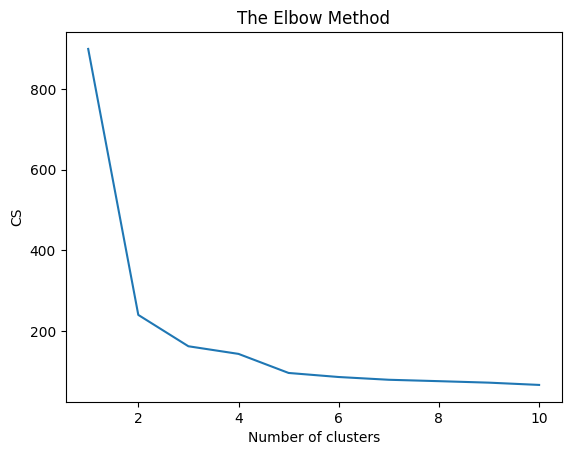

In [206]:
plot_elbow(X, 11, KMeansModel=KMeansBase)

**Plot with SkLearn model**

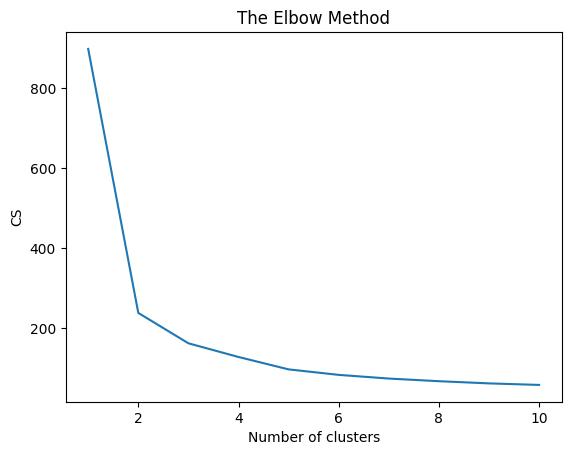

In [207]:
plot_elbow(X, 11, KMeansModel=KMeans)

By the above plot, we can see that there is a kink at k=2.

Hence k=2 can be considered a good number of the cluster to cluster this data.

But, we have seen that I have achieved a weak classification accuracy of 1% with k=2.

I will check the model accuracy with different number of clusters.

#### **K-Means model with different clusters**

##### **K-Means model with 3 clusters**

**Our model**

In [208]:
kmeansBase3 =  KMeansBase(n_clusters=3, random_state=0, max_iter = max_iteration)
kmeansBase3.fit(X)
check_labeling(y, kmeansBase3.labels_)
print('Inertia: {0}'. format(kmeansBase3.inertia_))

Result: 486 out of 7050 samples were correctly labeled.
Accuracy score: 0.07
Inertia: 162.38511670264387


**Scikit Learn model**

In [209]:
kmeansSK3 =  KMeans(n_clusters=3, random_state=0, max_iter = max_iteration)
kmeansSK3.fit(X)
check_labeling(y, kmeansSK3.labels_)
print('Inertia: {0}'. format(kmeansSK3.inertia_))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02
Inertia: 161.5963340003362


##### **K-Means model with 4 clusters**

**Our model**

In [210]:
kmeansBase4 =  KMeansBase(n_clusters=4, random_state=0, max_iter = max_iteration)
kmeansBase4.fit(X)
check_labeling(y, kmeansBase4.labels_)
print('Inertia: {0}'. format(kmeansBase4.inertia_))

Result: 365 out of 7050 samples were correctly labeled.
Accuracy score: 0.05
Inertia: 143.48282155823824


**Scikit Learn model**

In [211]:
kmeansSK4 =  KMeans(n_clusters=4, random_state=0, max_iter = max_iteration)
kmeansSK4.fit(X)
check_labeling(y, kmeansSK4.labels_)
print('Inertia: {0}'. format(kmeansSK4.inertia_))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62
Inertia: 127.31313212987737


With k=4, our model achieved a relatively low accuracy of 6% while the Scikit Learn model achieved 62%, which is much better than our model.

The reason is because the Scikit Learn model uses "K-Means++" when initializing the focus, while our model still uses pure "K-Means".
So in the next section, we will implement "K-Means++"

## **K-Means++ implement**

### **Intuition**

Suppose we want to init ***K = 3*** clusters, and we have the following points:

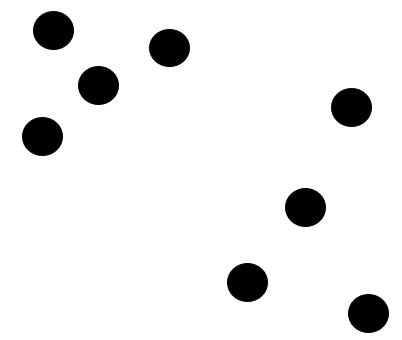


1. The initial step is to choose a data point at random to serve as the cluster centroid (K1):
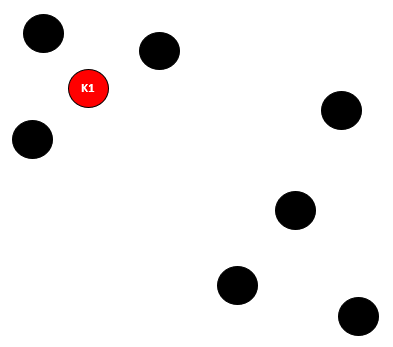


2. Assume the red point is chosen as the initial centroid. Now compute the distance between each data point and this centroid:
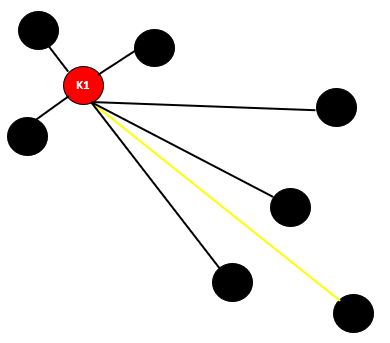

3. The next centroid (K2) is the one with the greatest squared distance from the present centroid:
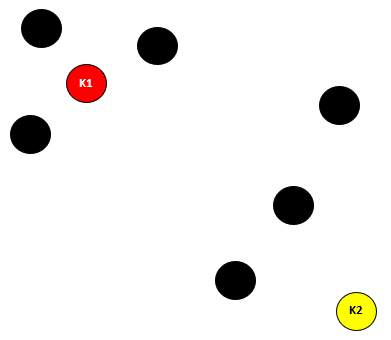


4. Now compute the distance between each data point and its nearest centroid:

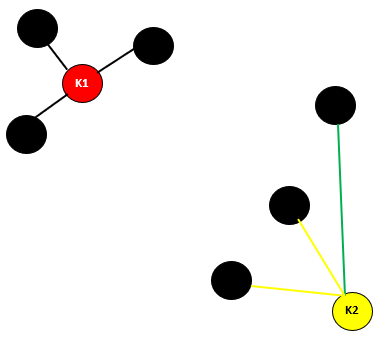


5. Choose the next centroid (K3) from the remaining data points, but select it with a probability that is proportional to the squared distance of each data point from the nearest centroid already chosen. In other words, data points that are farther away from the existing centroids have a higher chance of being chosen as the next centroid.

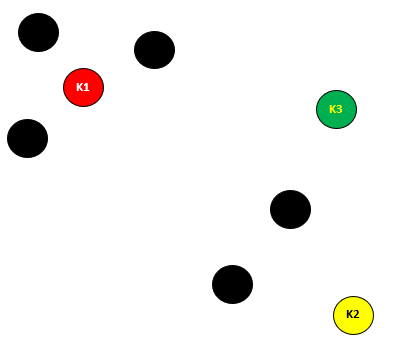

### **Implement**

#### **Draft code**

In [212]:
#This function for testing
# def init_centroids_kmeansPlus(X, K):
#   # np.random.seed(11)
#   centroids = []
#   first_centroid = X[np.random.choice(range(X.shape[0]), replace = False)]
#   centroids.append(first_centroid)
#   print("First centroid:", first_centroid)

#   for i in range(1, K):
#     euclidean_distances = []
#     print("--------------")
#     print("K:", i)
#     print("Centroid:", centroids)

#     for j in range(X.shape[0]):
#       print("####")
#       print("X:", X[j])
#       print("Distance:",(X[j] - np.array(centroids))**2)
#       print("Sum:", np.sum((X[j] - np.array(centroids))**2, axis=1))
#       print("Min:", np.min(np.sum((X[j] - np.array(centroids))**2)))
#       euclidean_distances.append(np.min(np.sum((X[j] - np.array(centroids))**2, axis=1)))

#     euclidean_distances = np.array(euclidean_distances)
#     print("Euclidean_distances array:", euclidean_distances)
#     print("Max distance:", np.max(euclidean_distances))
#     print("Arg Max distance:", np.argmax(euclidean_distances))

#     probabilities = euclidean_distances/np.sum(euclidean_distances)
#     print("Probabilities:", probabilities)

#     #next_centroid = X[np.random.choice(range(X.shape[0]), replace = False, p=probabilities)]
#     next_centroid = X[np.argmax(euclidean_distances)]
#     print("Next centroid:", next_centroid)

#     centroids.append(next_centroid)

#   return np.array(centroids)

In [213]:
# def init_centroids_kmeansPlus(X, K):
#   centroids = []
#   first_centroid = X[np.random.choice(range(X.shape[0]), replace = False)]
#   centroids.append(first_centroid)

#   for _ in range(1, K):
#     euclidean_distances = []

#     for i in range(X.shape[0]):
#       euclidean_distances.append(np.min(np.sum((X[i] - np.array(centroids))**2, axis=1)))

#     euclidean_distances = np.array(euclidean_distances)
#     next_centroid = X[np.argmax(euclidean_distances)]

#     centroids.append(next_centroid)

#   return np.array(centroids)

In [214]:
# X_test

In [215]:
# #Test init_centroids_kmeansPlus
# init_centroids_kmeansPlus(X_test, 3)

In [216]:
# def fit_Plus(X, K, max_interation=100):
#   labels = []
#   inter = 0

#   #1
#   centroids = [init_centroids_kmeansPlus(X, K)]

#   for _ in range(max_interation):
#     while True:
#       #2
#       labels.append(assign_clusters(X, centroids[-1]))

#       new_centroids = update_centroids(X, labels[-1], K)

#       #3
#       if has_converged(centroids[-1], new_centroids):
#         break
#       centroids.append(new_centroids)

#       inter +=1

#   return (centroids, labels, inter)

#### **K-Means++ Class**

In [217]:
class KMeansClustering(KMeansBase):
  def __init__(self, n_clusters, init="k-means++", max_iter = 100, random_state=None, tolerance=1e-4):
    super().__init__(n_clusters, max_iter, random_state, tolerance)
    self.init = init

  def init_centroids_kmeansPlus(self, X):
    centroids = []
    first_centroid = X[np.random.choice(range(X.shape[0]), replace = False)]
    centroids.append(first_centroid)

    for _ in range(1, self.K):
      euclidean_distances = []

      for i in range(X.shape[0]):
        euclidean_distances.append(np.min(np.sum((X[i] - np.array(centroids))**2, axis=1)))

      euclidean_distances = np.array(euclidean_distances)
      next_centroid = X[np.argmax(euclidean_distances)]

      centroids.append(next_centroid)

    return np.array(centroids)

  def fit(self, X):
    np.random.seed(self.random_state)
    n_samples, n_features = X.shape
    centroids = np.empty((self.K, n_features), dtype=X.dtype)
    cluster_labels = []
    iter = 0

    # Step 1: Initialize centroids using K-means++
    if self.init=="k-means++":
      centroids = self.init_centroids_kmeansPlus(X)
    else:
      centroids = self.init_centroids(X)

    for iteration in range(1, self.max_iter + 1):
        # Step 2: Assign data points to the nearest centroids
        cluster_labels = self.assign_clusters(X, centroids)

        # Step 3: Update centroids based on the assigned clusters
        new_centroids = self.update_centroids(X, cluster_labels)

        # Step 4: Check for convergence
        if np.all(np.abs(new_centroids - centroids) < self.tol):
            break

        centroids = new_centroids
        iter = iteration

    self.inertia_ = self.inertia(X, centroids, cluster_labels)
    self.labels_ = cluster_labels
    self.cluster_centers_ = centroids
    self.n_iter_ = iter

#### **Apply K-means++**

In [218]:
def kmeans_print_reusult(X, n_clusters, init, random_state=None, max_iter=100, KModel = KMeansClustering):
  kmeans = KModel(n_clusters=n_clusters, init=init, random_state=0, max_iter = max_iteration)
  kmeans.fit(X)
  print("Centroids: ", kmeans.cluster_centers_)
  print("Labels: ", kmeans.labels_)
  print("Interation: ", kmeans.n_iter_)
  print("Inertia: ", kmeans.inertia_)

  return kmeans.labels_

##### **With 2 clusters**

**Our model**

In [219]:
labels2 = kmeans_print_reusult(X, KModel = KMeansClustering, init="k-means++", n_clusters=2, random_state=0, max_iter = max_iteration)
check_labeling(y, labels2)

Centroids:  [[3.47851210e-01 3.80950606e-02 7.68637183e-04 7.29728840e-04
  3.75728091e-02 2.15002696e-03 2.36638425e-03 1.17727433e-03
  3.09306821e-03 1.41893545e-03]
 [9.86173854e-01 6.92542844e-02 2.94899987e-02 3.24593640e-02
  6.09779533e-02 5.20179148e-02 8.94331763e-03 1.06122235e-02
  7.97197729e-03 7.88236073e-03]]
Labels:  [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 

**Scikit Learn model**

In [220]:
labelsSK2 = kmeans_print_reusult(X, KModel = KMeans, init="k-means++", n_clusters=2, random_state=0, max_iter = max_iteration)
check_labeling(y, labelsSK2)

Centroids:  [[3.28506857e-01 3.90710874e-02 7.54854864e-04 7.53667113e-04
  3.85438884e-02 2.17448568e-03 2.43721364e-03 1.20039760e-03
  2.75348016e-03 1.45313276e-03]
 [9.54921576e-01 6.46330441e-02 2.67028654e-02 2.93171709e-02
  5.71231462e-02 4.71007076e-02 8.18581889e-03 9.65207685e-03
  8.04219428e-03 7.19501847e-03]]
Labels:  [1 0 1 ... 0 0 0]
Interation:  3
Inertia:  237.75726404419646
Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


##### **With 3 clusters**

**Our model**

In [221]:
labels3 = kmeans_print_reusult(X, KModel = KMeansClustering, init="k-means++", n_clusters=3, random_state=0, max_iter = max_iteration)
check_labeling(y, labels3)

Centroids:  [[3.50233892e-01 2.04001388e-02 6.74716085e-04 5.26401658e-04
  1.99265406e-02 1.94272359e-03 2.01025237e-03 1.14615081e-03
  3.26649447e-03 1.48220622e-03]
 [1.00000000e+00 5.32074218e-02 3.10281501e-02 3.41969728e-02
  4.45043848e-02 5.48944478e-02 8.93650297e-03 1.12157297e-02
  8.23529412e-03 8.31697055e-03]
 [4.79919679e-01 3.97403627e-01 3.04146553e-03 4.29990992e-03
  3.96037014e-01 5.25847683e-03 9.82707810e-03 1.24702632e-03
  9.44956296e-04 1.94325690e-04]]
Labels:  [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0,

**Scikit Learn model**

In [222]:
labelsSK3 = kmeans_print_reusult(X, KModel = KMeans, init="k-means++", n_clusters=3, random_state=0, max_iter = max_iteration)
check_labeling(y, labelsSK3)

Centroids:  [[3.28742853e-01 1.99588196e-02 6.50282622e-04 5.37894046e-04
  1.94880247e-02 1.93982105e-03 2.03104006e-03 1.16647149e-03
  2.84240297e-03 1.51976868e-03]
 [9.63364293e-01 5.06532935e-02 2.77360441e-02 3.04804142e-02
  4.28478700e-02 4.90844018e-02 8.17287347e-03 1.00742442e-02
  8.36216840e-03 7.50274643e-03]
 [4.79102956e-01 4.00444107e-01 3.03960092e-03 4.33797051e-03
  3.99082569e-01 5.26906195e-03 9.70232988e-03 1.26609400e-03
  9.59405169e-04 1.97297031e-04]]
Labels:  [1 0 1 ... 0 0 0]
Interation:  6
Inertia:  161.5963340003362
Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


##### **With 4 clusters**

**Our model**

With K-Means++

In [223]:
labels4 = kmeans_print_reusult(X, KModel = KMeansClustering, init="k-means++", n_clusters=4, random_state=0, max_iter = max_iteration)
check_labeling(y, labels4)

Centroids:  [[3.50154635e-01 2.04599997e-02 6.74606524e-04 5.26282535e-04
  1.99865087e-02 1.94228396e-03 2.00979746e-03 1.14589144e-03
  3.26575527e-03 1.48187081e-03]
 [1.00000000e+00 2.57933888e-01 1.64178980e-01 1.93081042e-01
  2.00664838e-01 3.38288393e-01 1.12009662e-01 7.67585662e-02
  4.79461858e-02 5.86296209e-02]
 [4.90603363e-01 3.97888828e-01 3.03380301e-03 4.27164508e-03
  3.96542491e-01 5.18045789e-03 9.68127575e-03 1.22852445e-03
  9.30936173e-04 1.91442519e-04]
 [1.00000000e+00 3.92233059e-02 2.26515574e-02 2.41951601e-02
  3.35806888e-02 3.70476217e-02 2.41475804e-03 7.08403096e-03
  5.73599862e-03 5.14454066e-03]]
Labels:  [3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3

Without K-Means++

In [224]:
labelsBase4 = kmeans_print_reusult(X, KModel = KMeansClustering, init="random", n_clusters=4, random_state=0, max_iter = max_iteration)
check_labeling(y, labelsBase4)

Centroids:  [[1.00000000e+00 3.70762995e-02 2.38485859e-02 2.47674444e-02
  3.13111517e-02 3.78268104e-02 2.46348376e-03 7.32261369e-03
  5.97833539e-03 5.20339875e-03]
 [1.00000000e+00 3.22288500e-01 1.07331534e-01 1.36127491e-01
  2.81808378e-01 2.38723394e-01 8.07925089e-02 5.33818623e-02
  3.23685030e-02 4.21573647e-02]
 [5.27822798e-01 2.08915477e-01 2.15924385e-03 2.33976204e-03
  2.07685981e-01 4.87457107e-03 7.49740564e-03 1.47622046e-03
  4.92579528e-03 6.79667486e-04]
 [3.28616736e-01 1.83217490e-02 6.29977379e-04 5.14357844e-04
  1.78856735e-02 1.78608362e-03 1.83410237e-03 1.11414466e-03
  2.85578979e-03 1.51099009e-03]]
Labels:  [0, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 0

**Scikit Learn model**

In [225]:
labelsSK4 = kmeans_print_reusult(X, KModel = KMeans, init="k-means++", n_clusters=4, random_state=0, max_iter = max_iteration)
check_labeling(y, labelsSK4)

Centroids:  [[9.60808581e-01 3.57662757e-02 2.12257291e-02 2.19584239e-02
  3.06011015e-02 3.37134741e-02 2.42034095e-03 6.57701120e-03
  6.39034492e-03 4.71095497e-03]
 [3.29203110e-01 1.88437644e-02 6.48534102e-04 5.23444525e-04
  1.83849882e-02 1.88150929e-03 1.98733142e-03 1.12037536e-03
  2.85828617e-03 1.52826107e-03]
 [4.05291005e-01 3.73783574e-01 2.97919644e-03 4.08322207e-03
  3.72184814e-01 6.35403832e-03 1.07342697e-02 2.00181984e-03
  9.95953937e-04 2.04813108e-04]
 [1.00000000e+00 3.20218847e-01 1.04084240e-01 1.31991373e-01
  2.80984267e-01 2.31378059e-01 7.83065855e-02 5.17393435e-02
  3.13725490e-02 4.08602151e-02]]
Labels:  [0 1 0 ... 1 1 1]
Interation:  13
Inertia:  127.31313212987737
Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


We can see the results of Cluster = 4 and have some comments:
1. Comparing between our K-Means++ model and the Scikit Learn model, the Scikit Learn model still has higher accuracy (62%) while our model only has 33%.
2. Comparing our K-Means++ model and the pure K-Means model, the accuracy of the K-Means++ model has higher accuracy  (33%) while the pure K-Means model is only 5 %.
3. So we need more techniques to improve our model.

# **Results and conclusion**

1. In this project, I have implemented the most popular unsupervised clustering technique called K-Means Clustering.

2. I have applied the elbow method and find that k=2 (k is number of clusters) can be considered a good number of cluster to cluster this data.

3. I have find that the model has very high inertia of 240.06679. So, this is not a good model fit to the data.

4. I have achieved a weak classification accuracy of 1% with k=2 by our unsupervised model.

5. So, I have changed the value of k and find relatively higher classification accuracy of 62% with k=4.

6. Hence, we can conclude that k=4 being the optimal number of clusters.

7. The Scikit learning model still has higher accuracy (62%) while our model only has 33%. So we need to use more techniques to improve our model.


# **References**

PRASHANT BANERJEE's kernel: https://www.kaggle.com/code/prashant111/k-means-clustering-with-python/notebook

Dataset: https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo